# 지도학습(머신러닝)
- 머신러닝으로 AI 모델링하기
    - 데이터 : 국민건강보험공단_건강검진정보
- 딥러닝으로 AI 모델링하기
    - invistico_Airline

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 1.선형회귀(Linear Regression)
- 데이터를 잘 표현하는 최적의 직선으로 예측을 하는 방법론
- y = ax + b

In [2]:
# 데이터 만들기(y=4x+7)
np.random.seed(2023)
x = []
y = []

for a in range(1,11):
    x.append(a)
    y.append(4*a+7)
    
#데이터 확인
print("x : ", x)
print("y : ", y)


x :  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y :  [11, 15, 19, 23, 27, 31, 35, 39, 43, 47]


In [3]:
# 선형회귀 라이브러리 불러오기
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

# 학습을 위한 행열변경((1,10) -> (10,1))
x = np.array(x).reshape(-1,1)

# 데이터 확인하기
print('데이터 확인')
print("x : ", x)
print("x.shape : ", x.shape)

데이터 확인
x :  [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
x.shape :  (10, 1)


기울기
[4.]
절편
7.000000000000011


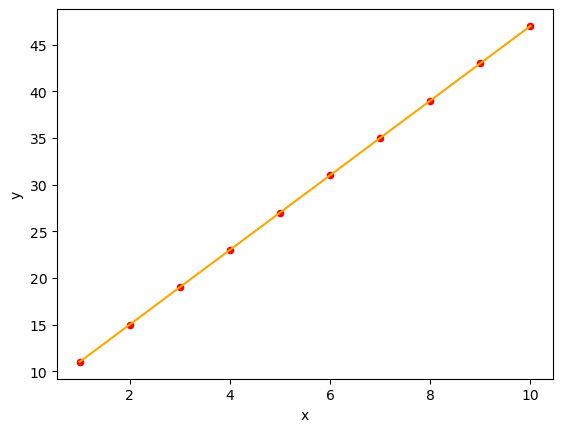

In [4]:
# 학습
LR.fit(x,y)

# coef, intercept 확인
print("기울기")
print(LR.coef_)
print("절편")
print(LR.intercept_)

# 결과 보기

# 점
plt.scatter(x, y, color = 'r', s=20)
# 선
y_hat = x * LR.coef_ + LR.intercept_
plt.plot(x, y_hat, color = 'orange')

plt.xlabel('x')
plt.ylabel('y')

plt.show()

### 사례 기반 실습
- 데이터 출처 : https://www.data.go.kr/data/15007122/fileData.do
- 데이터 파일명 : 국민건강보험공단_건강검진정보

### 목표
- 다양한 데이터를 바탕으로 LDL 콜레스테롤 수치를 예측해 보는 선형회귀모델 만들기

### 가정
- 데이터 중 치아 관련 문항은 콜레스테롤과 상관없다

# 2.선형회귀 실습하기

### 2-1._데이터 전처리

In [5]:
# 데이터 불러오기
df = pd.read_csv('./지도학습_데이터/국민건강보험공단_건강검진정보_20211231.csv', encoding='cp949')

# 데이터 보는 범위 확장하기
# display 옵션을 통한 전체 열 확장
pd.set_option('display.max_columns', None)
df.head()

,HCHK_YEAR,IDV_ID,SIDO,SEX,AGE_GROUP,HEIGHT,WEIGHT,WAIST,SIGHT_LEFT,SIGHT_RIGHT,HEAR_LEFT,HEAR_RIGHT,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,HCHK_OE_INSPEC_YN,CRS_YN,TTH_MSS_YN,ODT_TRB_YN,WSDM_DIS_YN,TTR_YN,DATA_STD_DT
0,2021,2551207,41,2,12,160,60,79.0,0.0,0.0,1.0,1.0,101.0,60.0,93.0,NaN,NaN,NaN,NaN,13.0,1.0,0.0,23.0,21.0,23.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,2022-08-11
1,2021,4030716,41,2,11,160,60,74.0,0.0,0.0,1.0,1.0,121.0,75.0,108.0,NaN,NaN,NaN,NaN,13.0,1.0,0.0,22.0,21.0,12.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,2022-08-11
2,2021,3297511,41,2,9,150,60,72.0,0.0,0.0,1.0,1.0,135.0,82.0,104.0,NaN,NaN,NaN,NaN,13.0,1.0,0.0,18.0,26.0,70.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,2022-08-11
3,2021,1638533,41,2,16,150,60,86.0,0.0,0.0,1.0,1.0,130.0,77.0,146.0,NaN,NaN,NaN,NaN,13.0,1.0,0.0,17.0,9.0,24.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,2022-08-11
4,2021,456602,41,2,13,155,60,66.0,0.0,0.0,1.0,1.0,120.0,80.0,90.0,NaN,NaN,NaN,NaN,13.0,1.0,0.0,27.0,19.0,12.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,2022-08-11


In [6]:
columns_name = ['기준년도', 'ID', '시도코드', '성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)',
                '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '공복혈당', 
                '총 콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌',
                '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부', '구강검진 수검여부', 
                '치아우식증유무', '결손치 유무', '치아마모증유무', '사랑니 이상', '치석', '데이터 공개일차']

# 컬럼명 바꾸기
df.columns = columns_name
df.head()

,기준년도,ID,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,공복혈당,총 콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치 유무,치아마모증유무,사랑니 이상,치석,데이터 공개일차
0,2021,2551207,41,2,12,160,60,79.0,0.0,0.0,1.0,1.0,101.0,60.0,93.0,NaN,NaN,NaN,NaN,13.0,1.0,0.0,23.0,21.0,23.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,2022-08-11
1,2021,4030716,41,2,11,160,60,74.0,0.0,0.0,1.0,1.0,121.0,75.0,108.0,NaN,NaN,NaN,NaN,13.0,1.0,0.0,22.0,21.0,12.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,2022-08-11
2,2021,3297511,41,2,9,150,60,72.0,0.0,0.0,1.0,1.0,135.0,82.0,104.0,NaN,NaN,NaN,NaN,13.0,1.0,0.0,18.0,26.0,70.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,2022-08-11
3,2021,1638533,41,2,16,150,60,86.0,0.0,0.0,1.0,1.0,130.0,77.0,146.0,NaN,NaN,NaN,NaN,13.0,1.0,0.0,17.0,9.0,24.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,2022-08-11
4,2021,456602,41,2,13,155,60,66.0,0.0,0.0,1.0,1.0,120.0,80.0,90.0,NaN,NaN,NaN,NaN,13.0,1.0,0.0,27.0,19.0,12.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,2022-08-11


##### 시력, 청력, 차아 관련 칼럼은 관계없다는 가정하에 열 제거

In [9]:
irrelevant_columns = ['시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '구강검진 수검여부', '치아우식증유무', '결손치 유무', '치아마모증유무', '사랑니 이상', '치석', '데이터 공개일차']

df.drop(columns=irrelevant_columns, axis=1, inplace=True)
df.head()

,기준년도,ID,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,수축기혈압,이완기혈압,공복혈당,총 콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부
0,2021,2551207,41,2,12,160,60,79.0,101.0,60.0,93.0,NaN,NaN,NaN,NaN,13.0,1.0,0.0,23.0,21.0,23.0,1.0,0.0
1,2021,4030716,41,2,11,160,60,74.0,121.0,75.0,108.0,NaN,NaN,NaN,NaN,13.0,1.0,0.0,22.0,21.0,12.0,1.0,1.0
2,2021,3297511,41,2,9,150,60,72.0,135.0,82.0,104.0,NaN,NaN,NaN,NaN,13.0,1.0,0.0,18.0,26.0,70.0,1.0,1.0
3,2021,1638533,41,2,16,150,60,86.0,130.0,77.0,146.0,NaN,NaN,NaN,NaN,13.0,1.0,0.0,17.0,9.0,24.0,1.0,0.0
4,2021,456602,41,2,13,155,60,66.0,120.0,80.0,90.0,NaN,NaN,NaN,NaN,13.0,1.0,0.0,27.0,19.0,12.0,1.0,1.0


##### 각 칼럼 확인해서 삭제 여부 판단하기

In [10]:
for name in df.columns:
    print(name)
    print(df[f'{name}'].value_counts())
    print('-----------------------------------------')

기준년도
2021    1000000
Name: 기준년도, dtype: int64
-----------------------------------------
ID
2551207    1
3364050    1
3404536    1
318636     1
385109     1
          ..
4592634    1
170099     1
2147393    1
1052593    1
4171104    1
Name: ID, Length: 1000000, dtype: int64
-----------------------------------------
시도코드
41    254167
11    169859
48     68381
26     66527
28     58832
47     53888
27     47592
44     41825
46     38431
45     37056
43     33171
42     30817
30     28769
29     27902
31     24180
49     11889
36      6714
Name: 시도코드, dtype: int64
-----------------------------------------
성별코드
1    500129
2    499871
Name: 성별코드, dtype: int64
-----------------------------------------
연령대코드(5세단위)
11    175607
9     162133
13    156036
10    140254
12    134794
14     90201
15     73948
16     34120
17     25674
18      7233
Name: 연령대코드(5세단위), dtype: int64
-----------------------------------------
신장(5Cm단위)
160    187047
155    182782
165    176611
170    152139
150    127050

##### 기준년도는 모든 행이 동일, ID는 모두 1개씩 부여되어 있음 --> 삭제하기

##### 시도코드, 성별코드는 가설을 확인하려고 할 때, 관련없음 --> 삭제하기

In [11]:
df.drop(columns=['ID', '기준년도', '시도코드' ,'성별코드'], axis=1, inplace=True)
df.head()

,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,수축기혈압,이완기혈압,공복혈당,총 콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부
0,12,160,60,79.0,101.0,60.0,93.0,NaN,NaN,NaN,NaN,13.0,1.0,0.0,23.0,21.0,23.0,1.0,0.0
1,11,160,60,74.0,121.0,75.0,108.0,NaN,NaN,NaN,NaN,13.0,1.0,0.0,22.0,21.0,12.0,1.0,1.0
2,9,150,60,72.0,135.0,82.0,104.0,NaN,NaN,NaN,NaN,13.0,1.0,0.0,18.0,26.0,70.0,1.0,1.0
3,16,150,60,86.0,130.0,77.0,146.0,NaN,NaN,NaN,NaN,13.0,1.0,0.0,17.0,9.0,24.0,1.0,0.0
4,13,155,60,66.0,120.0,80.0,90.0,NaN,NaN,NaN,NaN,13.0,1.0,0.0,27.0,19.0,12.0,1.0,1.0


##### 콜레스테롤 데이터가 null인 행 찾기 --> test변수 / 그 외 train변수에 저장

In [12]:
test = df[df['LDL콜레스테롤'].isnull()]
train = df.dropna(axis=0)

# 정답 데이터
y = train['LDL콜레스테롤']

# 학습 데이터
x = train.drop(columns='LDL콜레스테롤', axis=1)

### 2-2._데이터 분리

##### train, test 데이터 나누기(비율: 0.33)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)

print('X_train.shape : ', X_train.shape)
print('X_test.shape : ', X_test.shape)

print('y_train.shape : ', y_train.shape)
print('y_test.shape : ', y_test.shape)


X_train.shape :  (277857, 18)
X_test.shape :  (136855, 18)
y_train.shape :  (277857,)
y_test.shape :  (136855,)


### 2-3._주요 특징 **삭제 전** 모델 학습 및 검증(RMSE)
- LDL콜레스테롤 - 가중치가 큰 '총 콜레스테롤', 'HDL콜레스테롤' ,'음주여부'의 영향을 많이 받음

In [14]:
LR = LinearRegression()

# 선형회귀 모델 학습
LR.fit(X=X_train, y=y_train)

# 예측하기
y_pred = LR.predict(X_test)

# 기울기, 절편 확인
print('기울기 및 절편 확인')
print('coef : ', LR.coef_)
print('intercept : ', LR.intercept_)


# 가중치 확인하기
print('\n전체에 대한 가중치 확인')
for index, columns in enumerate(X_train.columns):
    print(f'{columns} = {LR.coef_[index]}')


기울기 및 절편 확인
coef :  [ 0.09698167  0.01683729  0.0430464   0.05732807 -0.01272057 -0.00871154
 -0.00409875  0.9672277  -0.17251271 -0.69699204  0.11194564 -0.0036176
  0.32866777 -0.00567028  0.00517389 -0.0043673   0.2956291  -0.80269557]
intercept :  -24.202044429604967

전체에 대한 가중치 확인
연령대코드(5세단위) = 0.09698167355471758
신장(5Cm단위) = 0.01683729135011738
체중(5Kg 단위) = 0.043046404457219696
허리둘레 = 0.05732806965539219
수축기혈압 = -0.012720569191572419
이완기혈압 = -0.008711542912445712
공복혈당 = -0.004098750915120153
총 콜레스테롤 = 0.9672276997269704
트리글리세라이드 = -0.1725127065507507
HDL콜레스테롤 = -0.6969920403322464
혈색소 = 0.11194564466494886
요단백 = -0.0036176040577047043
혈청크레아티닌 = 0.3286677672773083
(혈청지오티)AST = -0.005670284707430447
(혈청지오티)ALT = 0.005173888945753822
감마지티피 = -0.004367303176598375
흡연상태 = 0.29562910205074866
음주여부 = -0.8026955740925813


In [15]:
# 수치 데이터 검증 --> MSE, MAE, RMSE, R2
# RMSE 사용하기
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'주요 feature 삭제 전 rmse = {round(rmse,3)}')

주요 feature 삭제 전 rmse = 7.46


### 2-4._주요 특징 **삭제 후** 모델 학습 및 검증(RMSE)

##### 주요 feature 삭제하기

In [16]:

x = x.drop(['총 콜레스테롤', 'HDL콜레스테롤' ,'음주여부'], axis=1)

##### 주요 feature 삭제 후 재학습

In [17]:
# random_state, 비율 그대로 데이터 나누기 
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)

#선형회귀 모델 재학습
LR2 = LinearRegression()
LR2.fit(X_train, y_train)

# 예측하기
y_pred = LR2.predict(X_test)

# 기울기, 절편 확인
print('기울기 및 절편 확인')
print('coef : ', LR.coef_)
print('intercept : ', LR.intercept_)

# 가중치 확인하기
print('\n전체에 대한 가중치 확인')
for index, columns in enumerate(X_train.columns):
    print(f'{columns} = {LR.coef_[index]}')

기울기 및 절편 확인
coef :  [ 0.09698167  0.01683729  0.0430464   0.05732807 -0.01272057 -0.00871154
 -0.00409875  0.9672277  -0.17251271 -0.69699204  0.11194564 -0.0036176
  0.32866777 -0.00567028  0.00517389 -0.0043673   0.2956291  -0.80269557]
intercept :  -24.202044429604967

전체에 대한 가중치 확인
연령대코드(5세단위) = 0.09698167355471758
신장(5Cm단위) = 0.01683729135011738
체중(5Kg 단위) = 0.043046404457219696
허리둘레 = 0.05732806965539219
수축기혈압 = -0.012720569191572419
이완기혈압 = -0.008711542912445712
공복혈당 = -0.004098750915120153
트리글리세라이드 = 0.9672276997269704
혈색소 = -0.1725127065507507
요단백 = -0.6969920403322464
혈청크레아티닌 = 0.11194564466494886
(혈청지오티)AST = -0.0036176040577047043
(혈청지오티)ALT = 0.3286677672773083
감마지티피 = -0.005670284707430447
흡연상태 = 0.005173888945753822


In [18]:
# 수치 데이터 검증 --> MSE, MAE, RMSE, R2
# RMSE 사용하기
from sklearn.metrics import mean_squared_error

rmse2 = mean_squared_error(y_test, y_pred, squared=False)

print(f'주요 feature 삭제 후 rmse = {round(rmse2,3)}')

주요 feature 삭제 후 rmse = 38.246


### 2-5._결과 비교
주요 feature : '총 콜레스테롤', 'HDL콜레스테롤' ,'음주여부'

삭제 전 RMSE = 7.46
삭제 후 RMSE = 38.246

---> 오차가 5배 이상 커지는 것을 확인할 수 있음  
---> 선형성이 있는 데이터이므로 선형회귀 모델에 대해 어떤 Feature가 얼마나 영향이 있었는지 확인할 수 있었음

---

# 3.로지스틱회귀(Logistic Regression)
- Sigmoid 함수를 사용하여 데이터를 설명하는 최적의 선으로 예측하는 알고리즘
- 분류 모델이다.

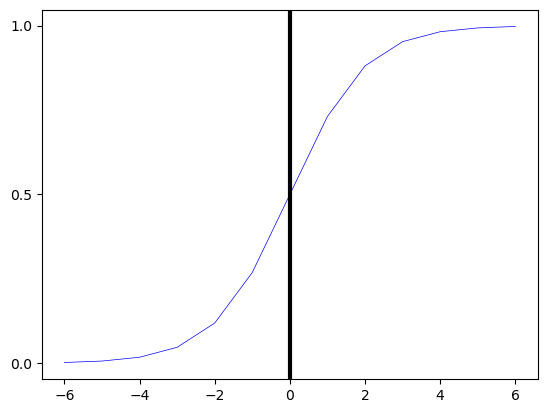

In [19]:
# 시그모이드 함수 작성하기
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# 그래프 그리기
# 데이터 생성
x = range(-6,7)  
y = sigmoid(np.array(x))

plt.plot(x, y, color = 'blue' , linewidth = 0.5)
plt.rcParams['axes.grid'] = True
plt.axvline(x=0, color = 'black', linewidth=3)

plt.yticks([0, 0.5, 1])
plt.show()

# ----> 0 ~ 1 사이의 값으로 변환

# 4.로지스틱회귀 실습하기
- 목표 : 선형회귀(회귀 알고리즘)와 로지스틱회귀(분류 알고리즘) 비교하기

- 하이퍼파라미터
    - max_iter : 알고리즘의 수렴을 위한 반복의 최대 횟수 지정
    - penalty : 규제 종류 선택(l1, l2, elasticnet, none)
    - C : 규제의 강도를 조절하는 파라미터로 값이 클수록 규제가 약해지고 값이 작을수록 규제가 강해짐

- 학습 후 가지는 속성
    - coef_ : 학습된 모형 특성의 가중치 추정값
    - intercept_ : 학습된 모델의 절편 추정값

### 4-1. 데이터 구성하기
- 9이하 0, 10이상 1

In [20]:
x_train = [a for a in range(3,18)]
x_train = np.array(x_train).reshape(-1,1)
y_train = np.array([0,0,0,0,0,0,0,1,1,1,1,1,1,1,1])

print(x_train.shape, y_train.shape)


x_test = np.array([0,1,2,18,19]).reshape(-1,1)
y_test = np.array([0,0,0,1,1])

print(x_test.shape, y_test.shape)

(15, 1) (15,)
(5, 1) (5,)


### 4-2. 로지스틱회귀 학습

In [21]:
from sklearn.linear_model import LogisticRegression

# 학습
logi_reg = LogisticRegression()
logi_reg.fit(x_train, y_train)
y_pred_logi = logi_reg.predict(x_test)

# 기울기, 절편 확인
print('기울기 및 절편 확인')
print('coef : ', logi_reg.coef_)
print('intercept : ', logi_reg.intercept_)

기울기 및 절편 확인
coef :  [[1.19383367]]
intercept :  [-11.34126808]


### 4-3.선형회귀 학습

In [22]:
LR3 = LinearRegression()
LR3.fit(x_train, y_train)
y_pred_LR3 = LR3.predict(x_test)

# 기울기, 절편 확인
print('기울기 및 절편 확인')
print('coef : ', LR3.coef_)
print('intercept : ', LR3.intercept_)


기울기 및 절편 확인
coef :  [0.1]
intercept :  -0.4666666666666669


### 4-4.그래프로 비교하기

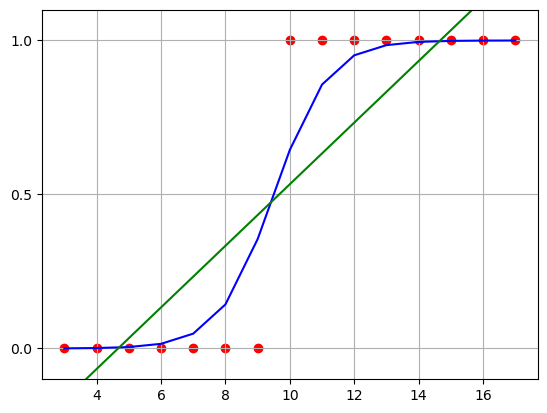

In [23]:
plt.scatter(x_train, y_train, color='red')

# 로지스틱
plt.plot(x_train, sigmoid(logi_reg.decision_function(x_train)), color='blue')

# 선형
plt.plot(x_train, LR3.predict(x_train), color='green')

plt.rcParams['axes.grid'] = True
plt.yticks([0, 0.5, 1])
plt.ylim([-0.1, 1.1])
plt.show()

---

# 5.의사결정 나무(Decision Tree)
- 트리 기반 모델
- 기본적으로 Feature를 조건 기반으로 참, 거짓으로 나눠 마치 스무고개를 하듯이 학습한다
- 트리를 따라가다 보면 머신러닝이 어떻게 학습하여 결론을 내는지 설명 가능하다
- 회귀 기반 모델이 아니기 때문에 수학적 가정이 불필요하다
- 범주형, 연속형 수치 모두 예측이 가능하다

- But, 선형성이 없으므로 트리를 너무 깊게 만들면 과대적합 발생 확률이 높아진다
- 출력변수가 연속형인 경우 에측력이 떨어질 수 있다.

# 6.의사결정나무 실습하기
- 데이터 : 건강검진 
- 목표 : 신장, 성별, 체중을 가지고 음주여부 예측하기

- 하이퍼파라미터
    - max_depth : 깊어질 수 있는 최대 깊이, 과대적합 방지용(default = None)
    - max_features : 최대로 사용할 feature의 개수, 과대적합 방지용
    - min_samples_split : 트리의 노드가 가지고 있는 최소한의 샘플 수, default = 2, 과대적합 방지용

## 6-1. 데이터 준비

#### 데이터 추출

In [25]:
df = pd.read_csv('./지도학습_데이터/국민건강보험공단_건강검진정보_20211231.csv', encoding='cp949')
df.columns = columns_name

sample_df = df[['신장(5Cm단위)', '성별코드', '체중(5Kg 단위)', '음주여부']]
sample_df

,신장(5Cm단위),성별코드,체중(5Kg 단위),음주여부
0,160,2,60,0.0
1,160,2,60,1.0
2,150,2,60,1.0
3,150,2,60,0.0
4,155,2,60,1.0
...,...,...,...,...
999995,150,2,60,0.0
999996,170,1,100,0.0
999997,150,2,75,0.0
999998,160,2,55,0.0


#### 결측치 확인/제거

In [34]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   신장(5Cm단위)   1000000 non-null  int64  
 1   성별코드        1000000 non-null  int64  
 2   체중(5Kg 단위)  1000000 non-null  int64  
 3   음주여부        999832 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 30.5 MB


In [36]:
sample = sample_df.dropna()
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999832 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   신장(5Cm단위)   999832 non-null  int64  
 1   성별코드        999832 non-null  int64  
 2   체중(5Kg 단위)  999832 non-null  int64  
 3   음주여부        999832 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 38.1 MB


#### x,y 데이터 분리

In [37]:
X = sample.drop('음주여부', axis=1)
y = sample['음주여부']

#### 데이터 편향 확인

In [38]:
y.value_counts()

1.0    576965
0.0    422867
Name: 음주여부, dtype: int64

## 6-2.학습/검증 데이터 나누기

In [39]:
x_train, x_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=2023)
print("x_train.shape : ", x_train.shape)
print("x_valid.shape : ", x_valid.shape)

print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

x_train.shape :  (799865, 3)
x_valid.shape :  (199967, 3)
y_train.shape :  (799865,)
y_valid.shape :  (199967,)


## 6-3.의사결정나무 모델링하기

In [46]:
from sklearn.tree import DecisionTreeClassifier

# 학습
dt = DecisionTreeClassifier(max_depth=3, random_state=2023)
dt_model = dt.fit(x_train, y_train)

# 예측 
y_pred = dt_model.predict(x_valid)

# 정확도 검증
print('학습 정확도 = ', dt_model.score(x_train, y_train))
print('검증 정확도 = ', dt_model.score(x_valid, y_valid))

학습 정확도 =  0.6702005963506341
검증 정확도 =  0.6697605104842299


## 6-4.그래프 그리기

In [47]:
import graphviz
from sklearn.tree import export_graphviz

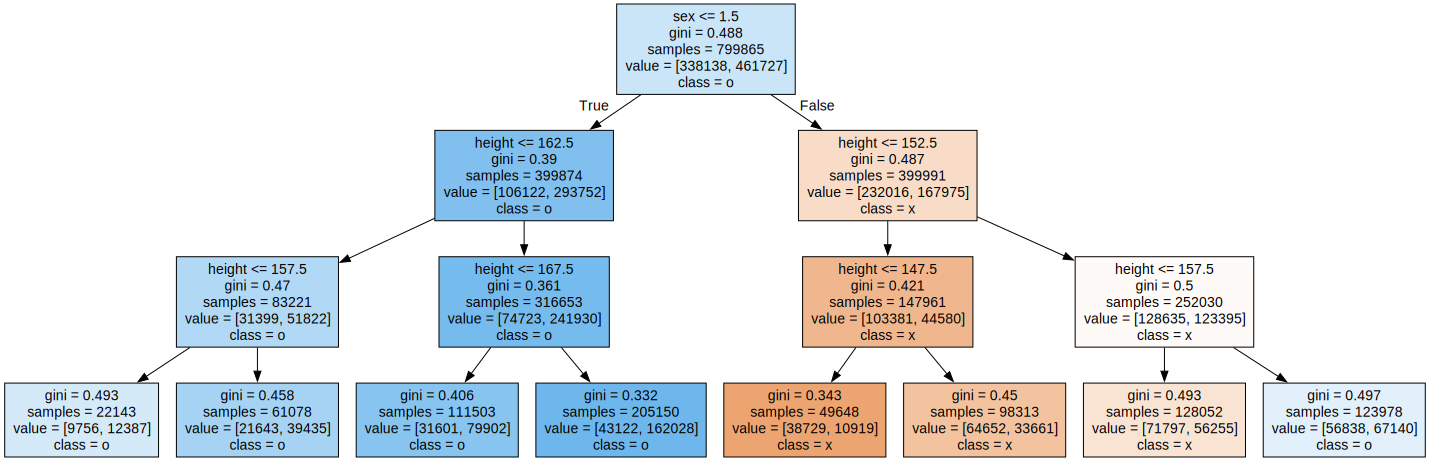

In [48]:
tree_graph = graphviz.Source(export_graphviz(dt_model,
                                             class_names=['x', 'o'],
                                             feature_names=['height', 'sex', 'weight'], 
                                             impurity=True,
                                             filled=True))

tree_graph




### 설명 
- 노드 : 네모박스
- 루트 노드 : 맨 처음 시작하는 박스
- 리프 노드 : 분할 조건이 없는 경우

- 노드 첫 줄 : 분할 조건, 자식 노드를 만들기 위한 규칙 조건
- 지니계수 : 불순도 지표
- 지니계수를 낮추는 방향으로 가지를 분할한다

## 6-5.불순도(Impurity)란?

- 불순도가 낮다 : 다양한 데이터가 섞여 있다
- 과일바구니에 사과 5개만 들어있음 -> 순도 100%
- 과일바구니에 사과2, 배1, 바나나2개 들어있음 -> 순도 떨어짐

- 지니계수 : 불순도를 측정하는 지표, 데이터의 통계적인 분산의 정도를 정량화해서 표연한다.
- 노드의 분할 조건에 의핸 분할된 데이터의 불순도를 지니계수로 계산하고, 불순도를 줄이는 조건을 최종적으로 선택한다.  
**Gini = 1 - ∑p² (p : 전체에서 한 종류가 차지하는 비율)**

# 7.앙상블(ensemble) 
- 다수의 기본 모델을 생성하고 결합하여 하나의 새로운 모델을 생성하는 것
- 여러 모델을 결함하여 단일 모델보다 성능이 우수하다
- 편향과 분산을 모두 적절히 고려하기 때문에 과적합 방지에 용이하다
- 어떤 모델을 사용할 것이며, 어떻게 결합할 건지 고려해야 한다
  
- 대표적인 모델 : 랜덤 포레스트, 그래디언 부스팅
- 모델 결합 방법(앙상블 기법) : 보팅, 배깅, 부스팅

## 7-1.보팅(Voting)
- 하드보팅, 소프트보팅으로 구분한다
- **하드 보팅** : 모델의 결과 중 **가장 많이 분류된 결과**를 최종 결과로 선정하는 방법
- **소프트 보팅** : 모델별 **예측한 확률값의 평균**으로 최종값을 선정



## 7-2.배깅(Bagging)
- 알고리즘을 학습하여 생성된 여러 모델의 결과를 결합하는 방법
- 부트스트랩 기반 샘플링 기법이다. 부트스트랩은 원본 데이터에서 샘플을 여러 번 복원 추출하는 과정을 반복하는 샘플링 방법이다.
- 복원 샘플링을 통해 최종 모델의 분산을 줄여줌으로써 예측력을 향상시킨다
- 병렬학습이 가능하다는 장점이 있다
- 배깅의 대표적 알고리즘 : 랜덤 포레스트  
  
- 진행 순서
    - 학습 데이터로부터 부트스트랩 샘플링 진행 : 부트스트랩 데이터 생성
    - 각 부트스트랩 데이터로 다수의 개별 모델 학습
    - 최종 예측을 위해 Voting진행

### 7-2-1. Random Forest  실습

- 하이퍼 파라미터
    - max_depth : 깊어질 수 있는 최대 깊이, 과대적합 방지용(default = None)
    - n_estimators : 앙상블하는 트리 개수(default = 100)
    - max_features : 최대로 사용할 feature의 개수, 과대적합 방지용
    - min_smaples_split : 트리가 분할할 때 최소 샘플의 개수, default = 2, 과대적합 방지용

#### 1.데이터 준비

In [54]:
from tensorflow.keras.datasets.mnist import load_data
from sklearn.ensemble import RandomForestClassifier

In [53]:
(x_train, y_train), (x_test, y_test) = load_data()
print("변경 전 ", x_train.shape)

# 3차원의 이미지 행렬을 2차원으로 변경
X_train = x_train.reshape(-1, 784)
X_test = x_test.reshape(-1, 784)
print('변경 후 ', X_train.shape)

11490434/11490434 [==============================] - 2s 0us/step
변경 전  (60000, 28, 28)
변경 후  (60000, 784)


#### 2.의사결정나무 모델링

In [56]:
# 학습
dct = DecisionTreeClassifier(random_state=0)
dct.fit(X_train, y_train)

# 결과 확인
acc_train_dct = dct.score(X_train, y_train)
acc_test_dct = dct.score(X_test, y_test)

print("학습 결과 = ", acc_train_dct)
print("검증 결과 = ", acc_test_dct)

학습 결과 =  1.0
검증 결과 =  0.8781


#### 3.랜덤포레스트 모델링

In [57]:
# 학습
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

# 결과 확인
acc_train_rfc = rfc.score(X_train, y_train)
acc_test_rfc = rfc.score(X_test, y_test)

print("학습 결과 = ", acc_train_rfc)
print("검증 결과 = ", acc_test_rfc)

학습 결과 =  1.0
검증 결과 =  0.9705


#### 4.그래프 그리기

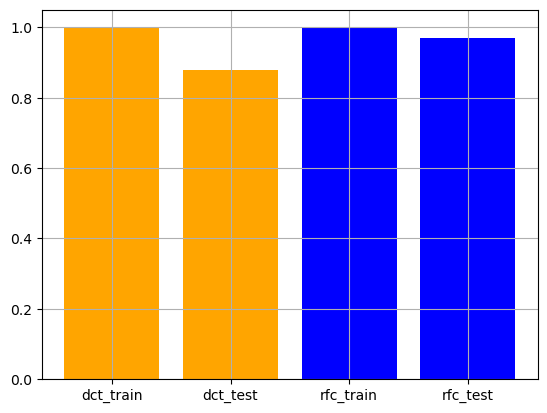

In [59]:
# x축 정의
acc_list_x = ['dct_train', 'dct_test', 'rfc_train', 'rfc_test']
# y축 정의
acc_list_y = [acc_train_dct, acc_test_dct, acc_train_rfc, acc_test_rfc]

# 색 지정
colors = ['orange' , 'orange', 'blue', 'blue']

#막대 그래프 그리기
plt.bar(acc_list_x, acc_list_y, color=colors)
plt.show()

#### 결과
1. 의사결정나무의 test 결과 < 랜덤포레스트의 test 결과  
--> 과대적합이 방지되어 test결과를 더 잘 맞췄음

### 7-2-2. DTC와 RFC 차이점 알아보기
- bootstrap 활용에 따른 차이
- 모델 결합 제합(1개로 제한)

In [60]:
rfc = RandomForestClassifier(random_state=0,
                             n_estimators=1,
                             max_features=None,
                             bootstrap=False)
rfc.fit(X_train, y_train)

acc_train_rfc = rfc.score(X_train, y_train)
acc_test_rfc = rfc.score(X_test, y_test)

acc_train_dct = dct.score(X_train, y_train)
acc_test_dct = dct.score(X_test, y_test)

print("rfc 학습 결과 = ", acc_train_rfc)
print("rfc 검증 결과 = ", acc_test_rfc)
print("dct 학습 결과 = ", acc_train_dct)
print("dct 검증 결과 = ", acc_test_dct)

rfc 학습 결과 =  1.0
rfc 검증 결과 =  0.8773
dct 학습 결과 =  1.0
dct 검증 결과 =  0.8781


## 7-3.Boosting
- 예측력이 약한 모델 여러 개를 순차적으로 연결하여 예측력이 강한 모델을 만드는 앙상블 방법
- 모델을 직렬로 결합 --> 앞선 모델이 예측한 것 중 틀린 데이터에 가중치를 부여하여 틀린 데이터를 더 잘 맞히도록 학습함
- 대표 모델 : 아다부스트(Adaboost), 그래디언트 부스팅(gradient boosting), 엑스지 부스트(XGBoost), 라이트지비엔(LightGBM)
- 진행 순서
    - 학습 데이터의 관측치를 동일한 가중치로 세팅하여 학습 / 모델 예측 수행
    - 모델 예측에 의해 오분류된 관측치에는 높은 가중치 부여, 정분류된 관측치에는 낮은 가중치 부여
    - 학습데이터를 다시 샘플링하여 학습
    - 각 모델의 예측 결과를 결합할 때 각 모델에 가중치를 주어 가중 평균으로 최종값 계산

### 7-3-1.Gradient Boosting 실습
- 장점 
    - 이진분류, 연속적인 수치 예측에도 작동을 잘함
- 단점
    - 희소한 고차원 데이터에서 잘 작동하지 않음
    - 훈련시간이 배깅 알고리즘보다 오래 걸림(직렬이기 때문에)
---
- 하이퍼파라미터 
    - learning_rate = 학습률, 너무 크면 성능을 떨어뜨리고, 너무 작으면 학습이 느림. 
    - n_estimators 와 같이 튜닝해야 함. default = 0.1
    - n_estimators : 부스팅 스테이지 수, default=100(커질수록 과대적합 확률이 높음)
    - max_depth : 트리의 깊이, 과대적합 방지용. default = 3
    - subsample : 샘플 사용 비율, 과대적합 방지용, default = 1.0
    - max_features : 최대로 사용할 feature의 비율, 과대적합 방지용, default = 1.0

#### 1.데이터 준비

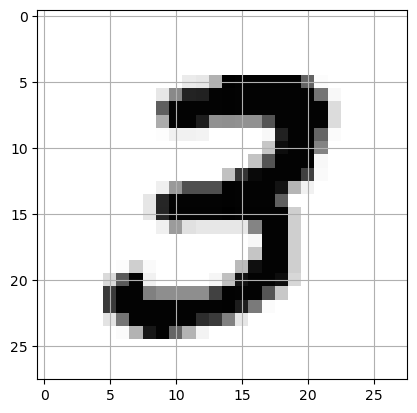

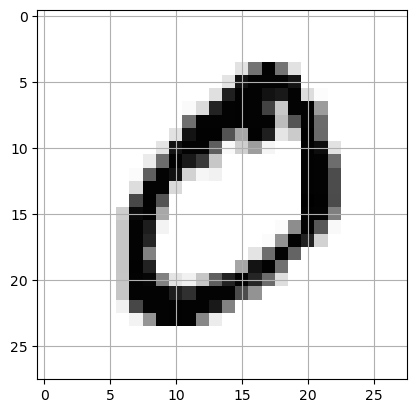

In [62]:
(x_train, y_train), (x_test, y_test) = load_data()

x_train = x_train[:2000]
x_test = x_test[:2000]
y_train = y_train[:2000]
y_test = y_test[:2000]

plt.imshow(x_train[7], cmap = 'Greys')
plt.show()

plt.imshow(x_train[1], cmap='Greys')
plt.show()

In [63]:
print("변경 전 ", x_train.shape)

# 3차원의 이미지 행렬을 2차원으로 변경
X_train = x_train.reshape(-1, 784)
X_test = x_test.reshape(-1, 784)
print('변경 후 ', X_train.shape)

변경 전  (2000, 28, 28)
변경 후  (2000, 784)


#### 2.의사결정나무 모델링

In [64]:
# 학습
dct = DecisionTreeClassifier(random_state=0)
dct.fit(X_train, y_train)

# 결과 확인
acc_train_dct = dct.score(X_train, y_train)
acc_test_dct = dct.score(X_test, y_test)

print("학습 결과 = ", acc_train_dct)
print("검증 결과 = ", acc_test_dct)

학습 결과 =  1.0
검증 결과 =  0.6525


#### 3.랜덤포레스트 모델링

In [65]:
# 학습
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

# 결과 확인
acc_train_rfc = rfc.score(X_train, y_train)
acc_test_rfc = rfc.score(X_test, y_test)

print("학습 결과 = ", acc_train_rfc)
print("검증 결과 = ", acc_test_rfc)

학습 결과 =  1.0
검증 결과 =  0.8745


#### 4.그래디언트 부스팅 모델링
참고 : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

# 학습
gbc = GradientBoostingClassifier(random_state=0, verbose=1)
gbc.fit(X_train, y_train)

# 결과 확인
acc_train_gbc = gbc.score(X_train, y_train)
acc_test_gbc = gbc.score(X_test, y_test)

print("학습 결과 = ", acc_train_gbc)
print("검증 결과 = ", acc_test_gbc)

      Iter       Train Loss   Remaining Time 
         1           1.8398            1.13m
         2           1.5879            1.08m
         3           1.4024            1.06m
         4           1.2584            1.05m
         5           1.1338            1.04m
         6           1.0258            1.03m
         7           0.9359            1.02m
         8           0.8556            1.00m
         9           0.7863           59.57s
        10           0.7247           59.02s
        20           0.3653           52.36s
        30           0.2167           45.71s
        40           0.1423           39.08s
        50           0.0982           32.57s
        60           0.0720           26.19s
        70           0.0540           19.73s
        80           0.0410           13.18s
        90           0.0321            6.61s
       100           0.0252            0.00s
학습 결과 =  1.0
검증 결과 =  0.8275


In [71]:
names = ['dct_train', 'dct_test', 'rfc_train', 'rfc_test', 'gbc_train', 'gbc_test']
results = [acc_train_dct, acc_test_dct, acc_train_rfc, acc_test_rfc, acc_train_gbc, acc_test_gbc]

for name, result in zip(names, results):
    print(f"{name} = {result}")

dct_train = 1.0
dct_test = 0.6525
rfc_train = 1.0
rfc_test = 0.8745
gbc_train = 1.0
gbc_test = 0.8275


#### 4.그래프 그리기

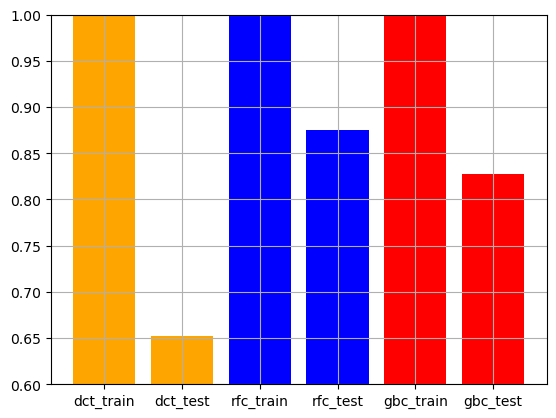

In [70]:
# x축 정의
acc_list_x = ['dct_train', 'dct_test', 'rfc_train', 'rfc_test', 'gbc_train', 'gbc_test']
# y축 정의
acc_list_y = [acc_train_dct, acc_test_dct, acc_train_rfc, acc_test_rfc, acc_train_gbc, acc_test_gbc]

# 색 지정
colors = ['orange' , 'orange', 'blue', 'blue', 'red', 'red']

#막대 그래프 그리기
plt.bar(acc_list_x, acc_list_y, color=colors)
plt.ylim([0.6, 1.0])
plt.show()